In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x600 with 0 Axes>

In [140]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [141]:
import geopandas as gpd

data = gpd.read_file("outputs/hotspot_vind_censustract_wc.geojson")

In [142]:
data["E_WHITE"] = data["E_TOTPOP"] - data[
    ["E_AFAM", "E_HISP", "E_ASIAN", "E_AIAN", "E_NHPI", "E_TWOMORE", "E_OTHERRACE"]
].sum(axis=1)

In [143]:
len(data[data["_hws"] != 0])

18107

In [144]:
# normalize demographic variables by each groups' total population
demographic_cols = [
    "E_AFAM",
    "E_HISP",
    "E_ASIAN",
    "E_AIAN",
    "E_NHPI",
    "E_TWOMORE",
    "E_OTHERRACE",
    "E_WHITE",
    "E_TOTPOP",
]

for dc in demographic_cols:
    data[dc + "_normalized"] = data[dc] * 100 / data[dc].sum()

data = data.rename(
    columns={
        "E_WHITE_normalized": "white",
        "E_AFAM_normalized": "black",
        "E_HISP_normalized": "hispanic",
        "E_ASIAN_normalized": "asian",
        "E_AIAN_normalized": "indian or \nalaska native",
    }
)

cats = ["white", "black", "hispanic", "asian", "indian or \nalaska native"]

In [145]:
total_cols = [
    "E_WHITE",
    "E_AFAM",
    "E_HISP",
    "E_ASIAN",
    "E_AIAN",
]
total_cols_labels = ["white", "black", "hispanic", "asian", "indian or \nalaska native"]

## Pie plots per demographic population

In [146]:
import plotting

hspts = plotting.get_hotspot_list()

In [147]:
df = data

In [149]:
totals_df

E_WHITE   E_AFAM    E_HISP  E_ASIAN  E_AIAN
exposure_category                                              
[0, 1)             30204778  3142790  20149616  6842458  510481
[1, 10)             4733313   200654   2027589   452996  170104
[10, 20)             909987    16720    344675    40910   47302
[20, 30)             408192     6947    140328    13003   26965
[30, 1000)          1486455    23298    404716    31708  116396

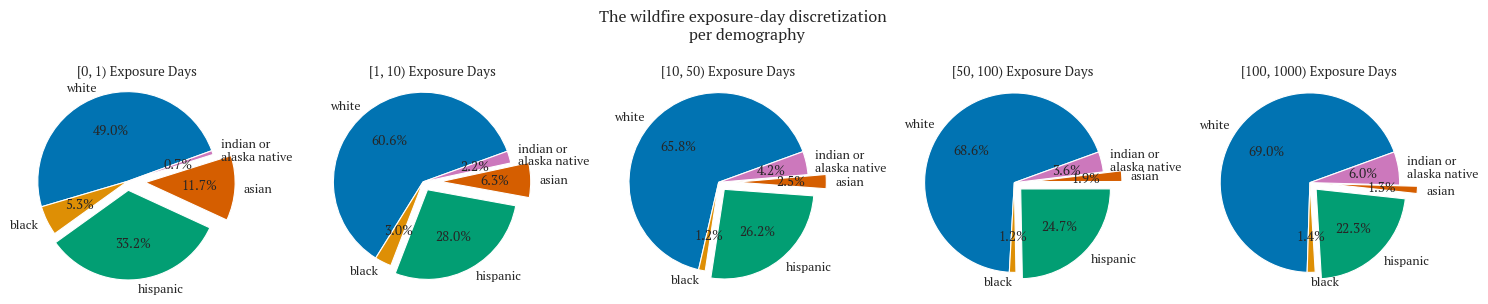

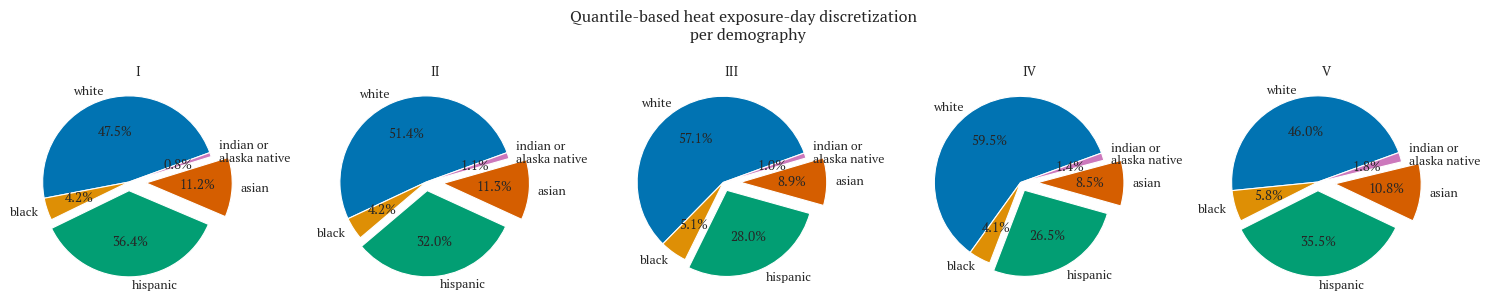

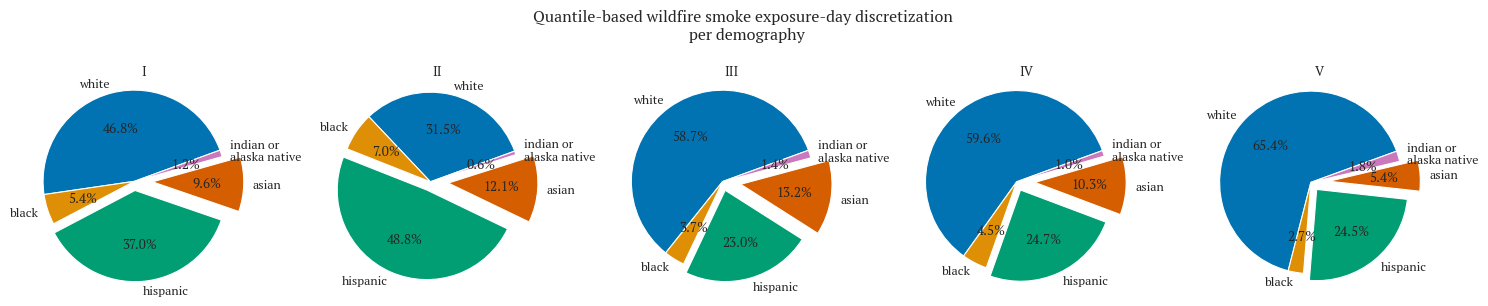

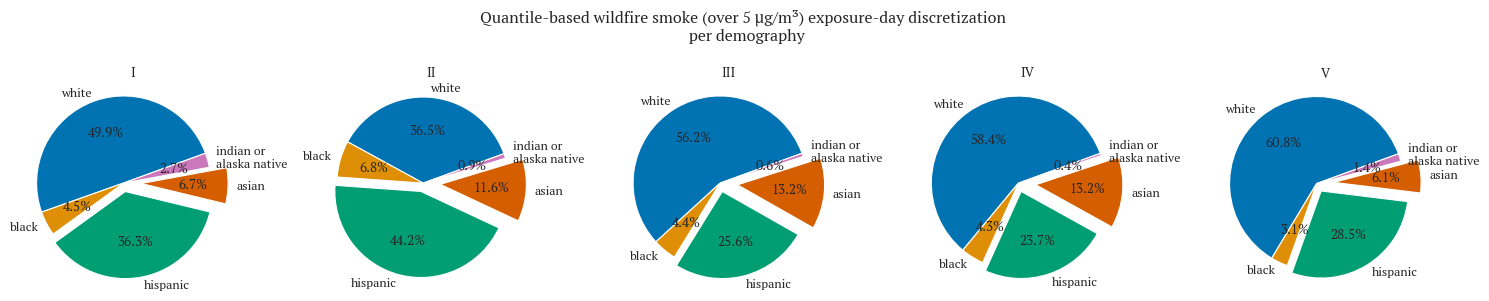

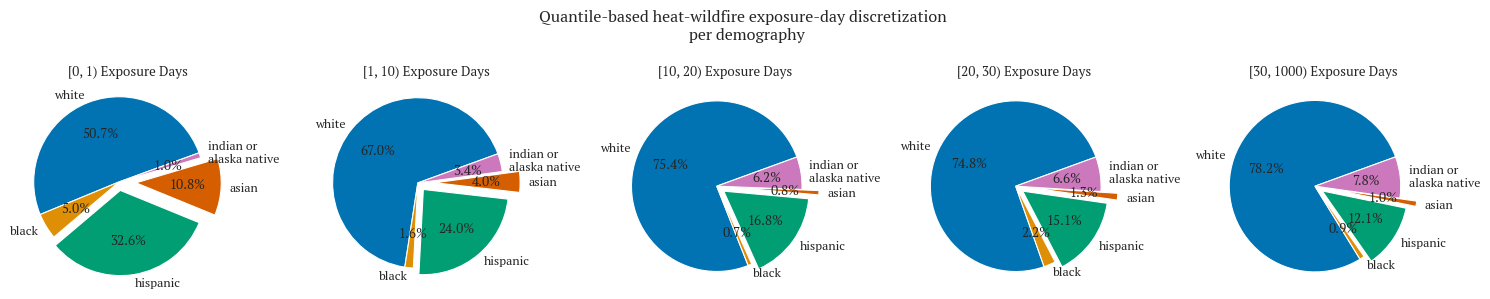

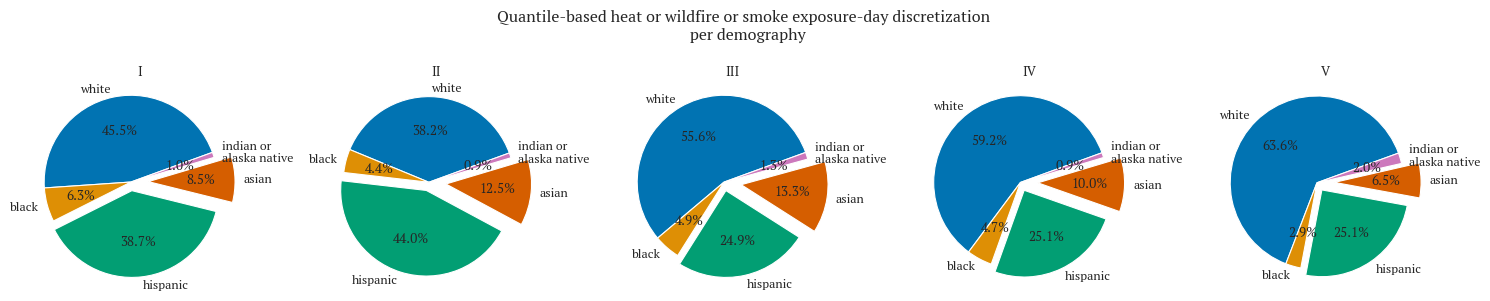

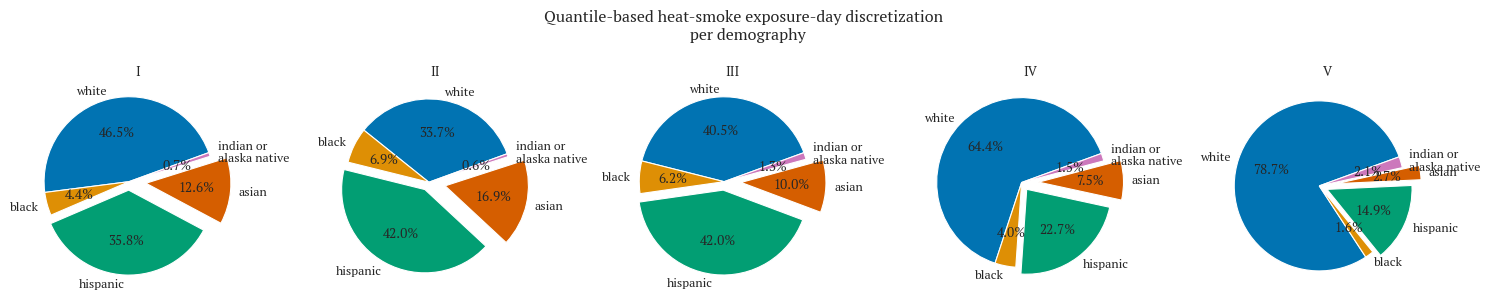

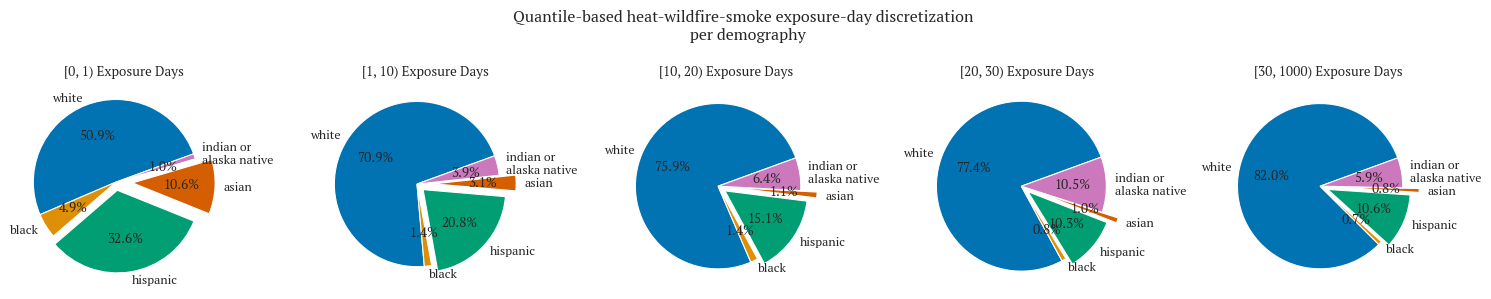

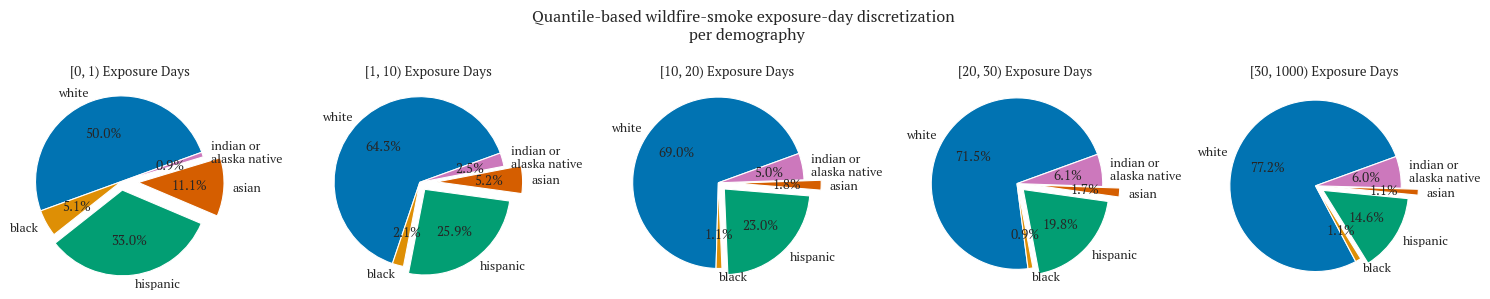

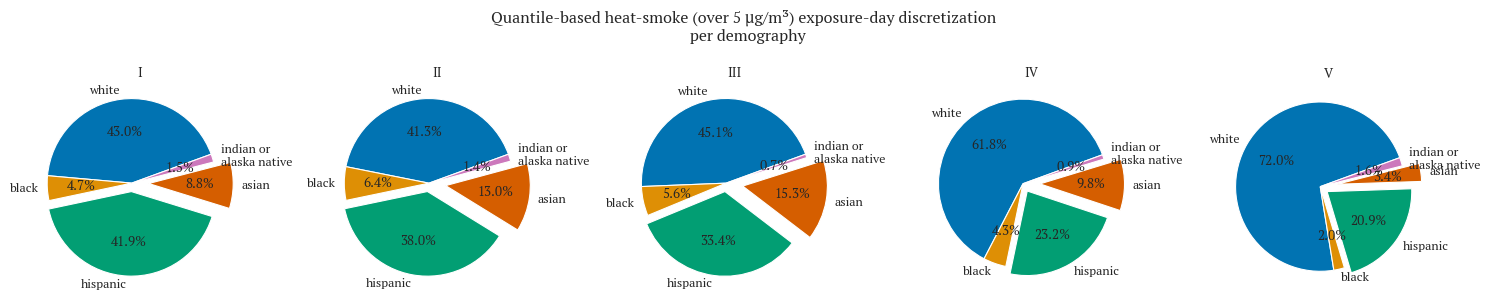

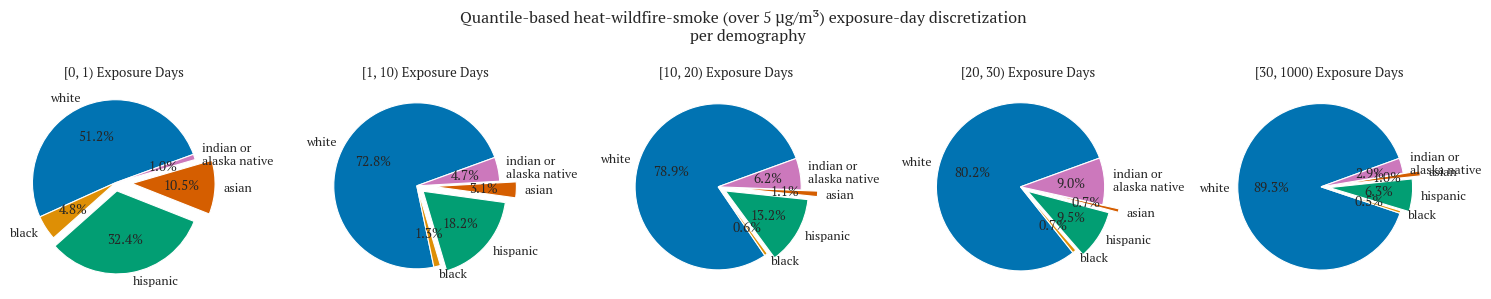

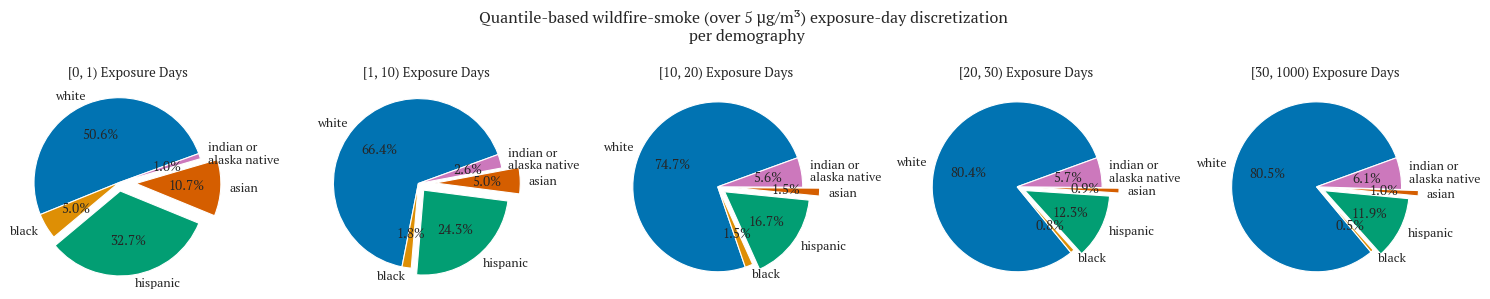

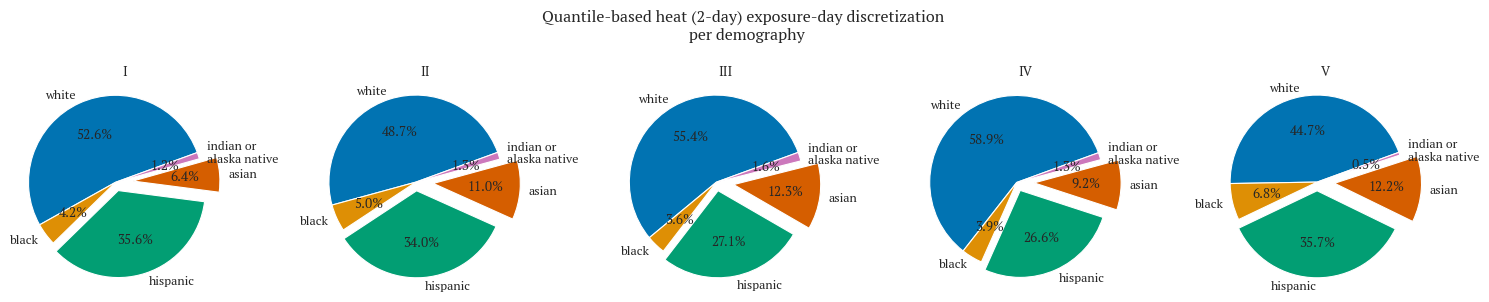

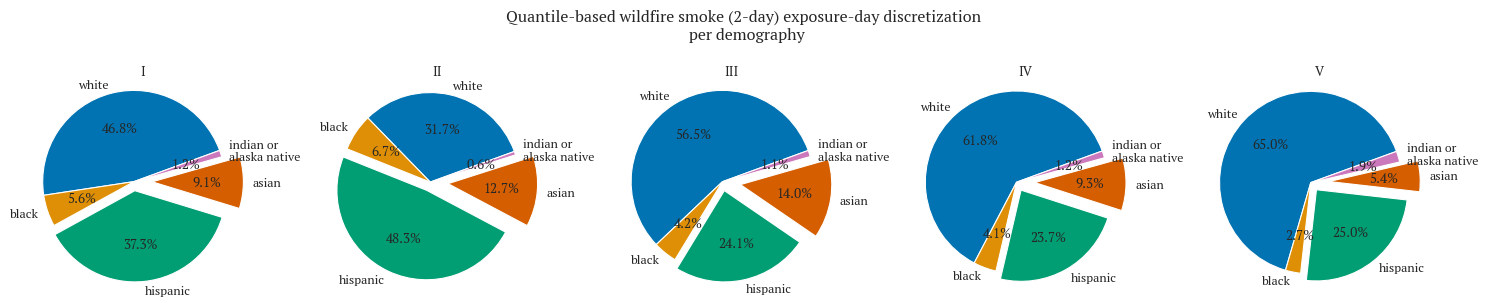

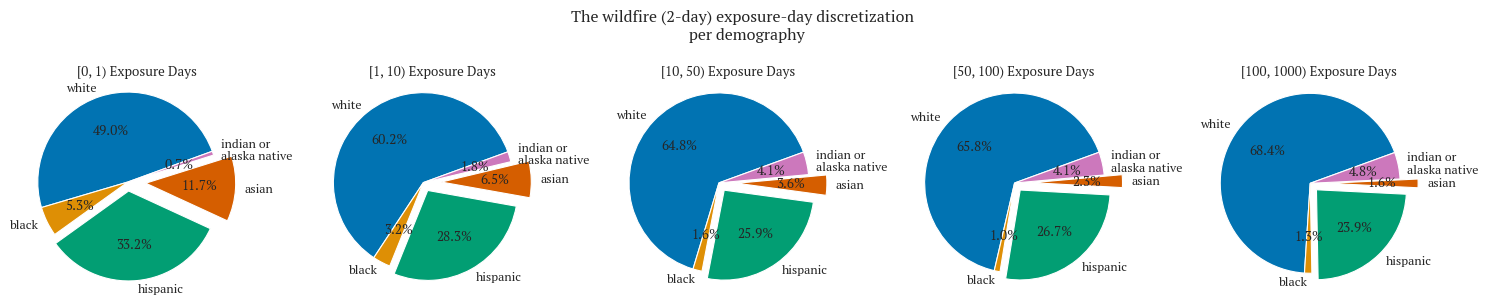

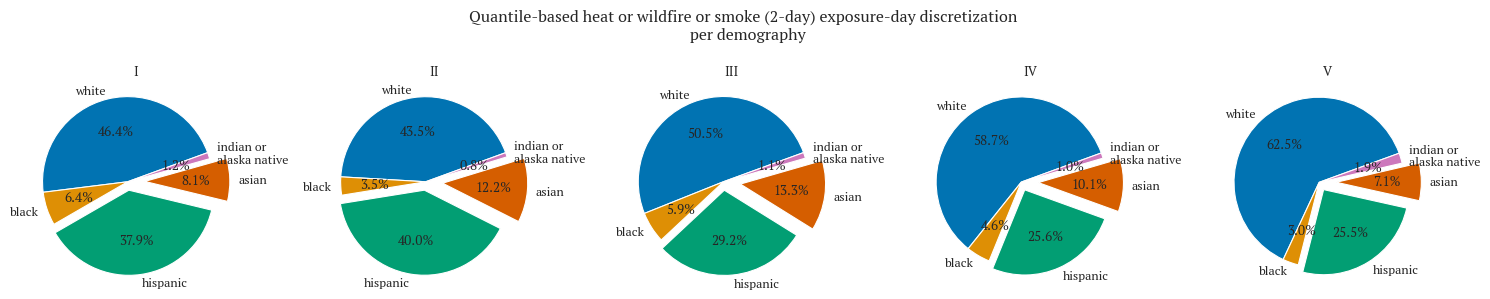

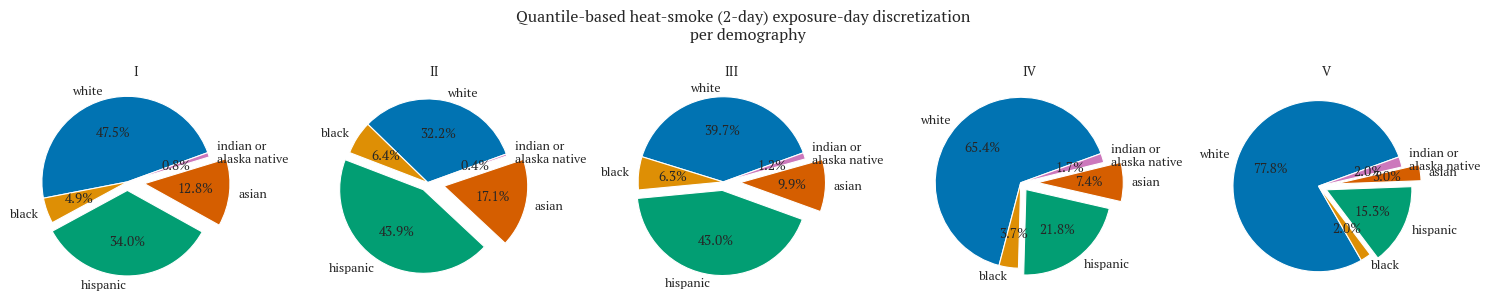

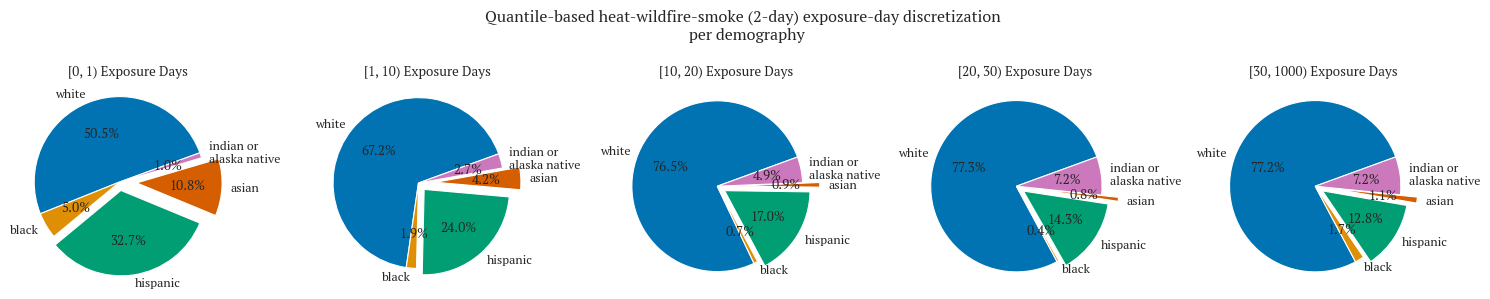

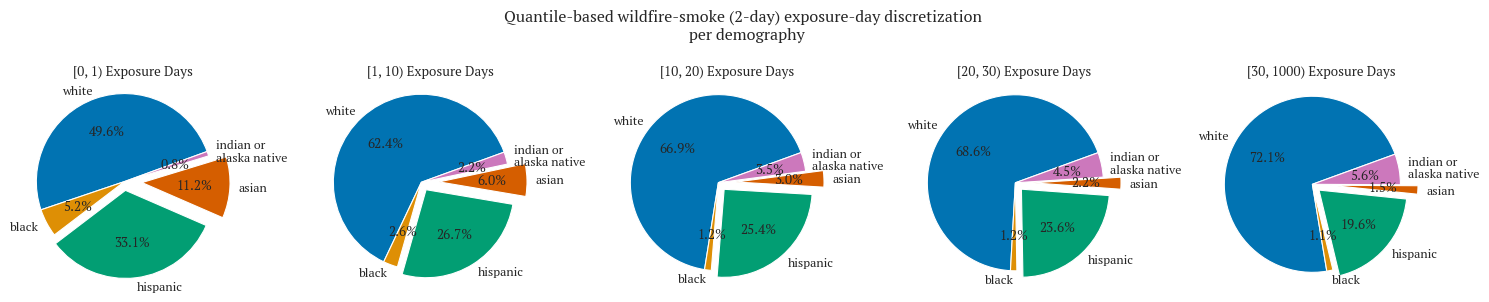

In [148]:
for hspt in hspts:
    df["exposure_category"] = helper_400.get_cut_vars(hspt, df[hspt])
    totals_df = df.groupby("exposure_category")[total_cols].sum()

    fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # 1 row, 5 columns of subplots
    explode = (0, 0, 0.1, 0.2, 0)
    for i, (index, row) in enumerate(totals_df.iterrows()):
        if hspt in [
            "wfday",
            "wfday_2d",
            "hw",
            "hws",
            "ws",
            "hws5",
            "ws5",
            "hws_2d",
            "ws_2d",
        ]:
            xlabel = f"{index} Exposure Days"
        else:
            xlabel = f"{index}"

        axs[i].pie(
            row,
            labels=total_cols_labels,
            startangle=20,
            autopct="%1.1f%%",
            explode=explode,
        )
        axs[i].set_title(xlabel)
        axs[i].axis("equal")

    plt.suptitle(helper_400.get_title(hspt))
    plt.tight_layout()
    plt.savefig("figures/pie_chart" + "_" + hspt + "_wc.png")

## Pie plots normalized per demographic population

In [163]:
normalized_df

white      black   hispanic      asian  \
exposure_category                                               
[0, 1)             80.028080  92.696486  87.352852  92.702730   
[1, 10)            12.540994   5.918283   8.790028   6.137263   
[10, 20)            2.411026   0.493156   1.494239   0.554255   
[20, 30)            1.081512   0.204902   0.608352   0.176167   
[30, 1000)          3.938388   0.687174   1.754530   0.429585   

                   indian or \nalaska native  
exposure_category                             
[0, 1)                             58.591928  
[1, 10)                            19.524177  
[10, 20)                            5.429223  
[20, 30)                            3.094986  
[30, 1000)                         13.359686

In [164]:
normalized_df.sum()

white                        100.0
black                        100.0
hispanic                     100.0
asian                        100.0
indian or \nalaska native    100.0
dtype: float64

In [161]:
def func(pct, allvals):
    absolute = int(pct * np.sum(allvals / 100.0))
    return "{:d}%".format(absolute)

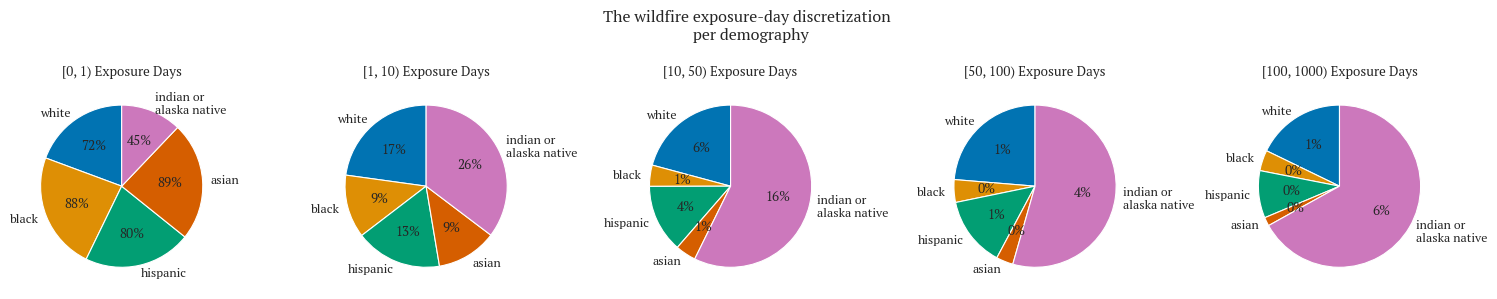

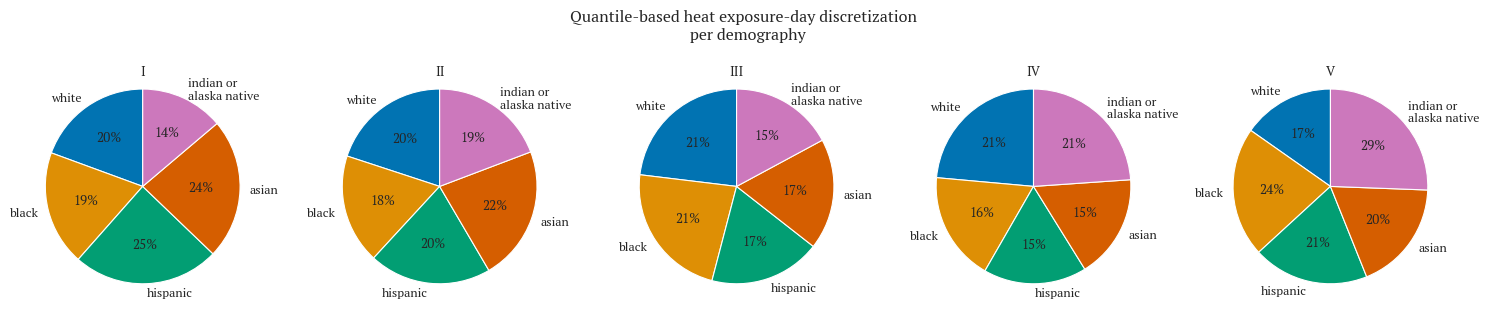

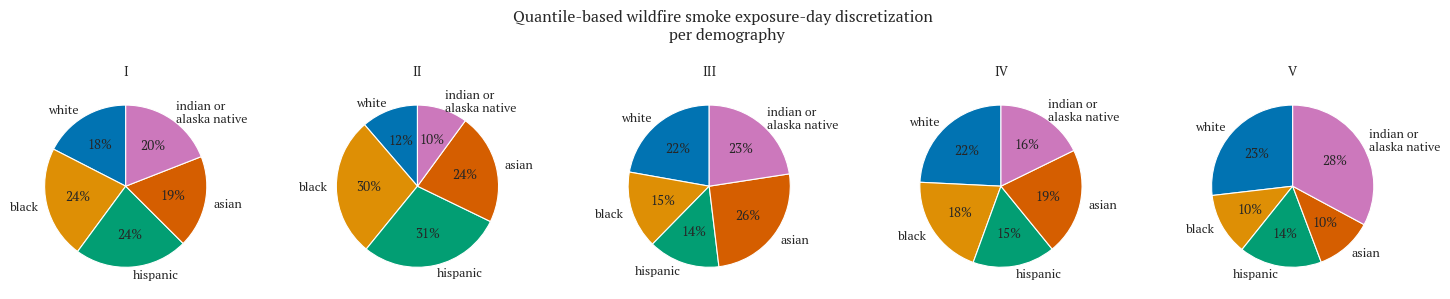

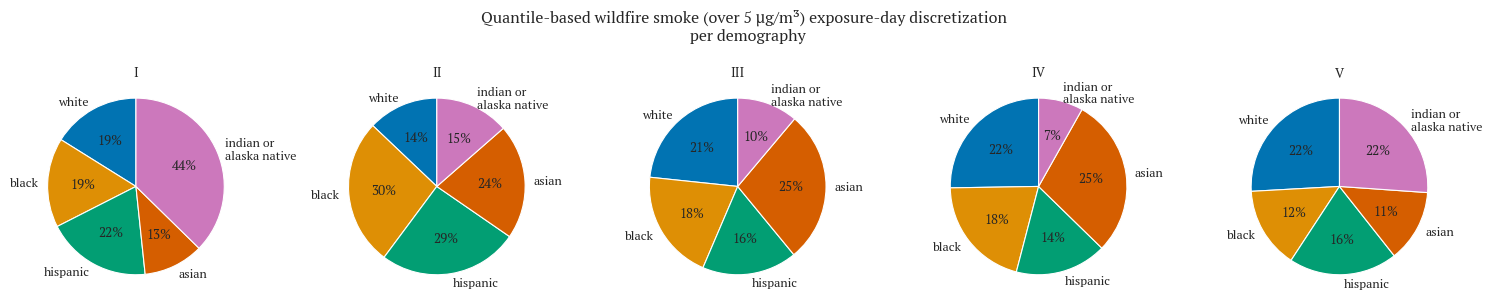

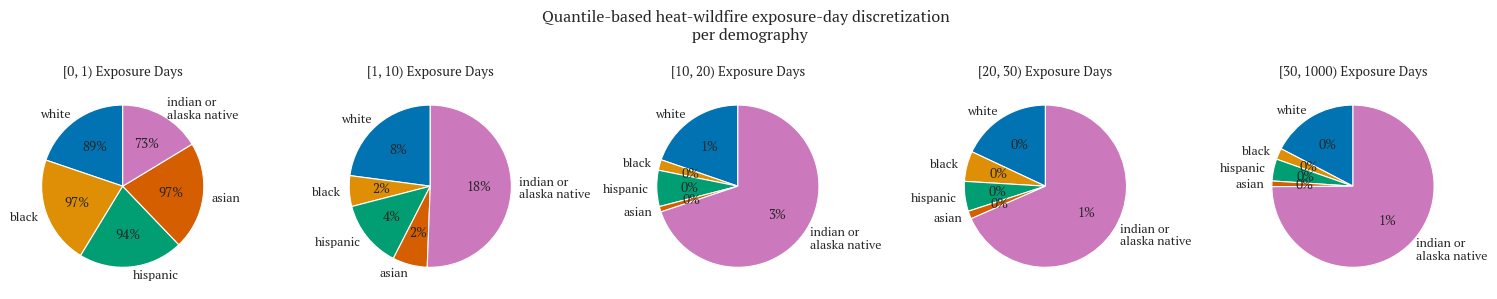

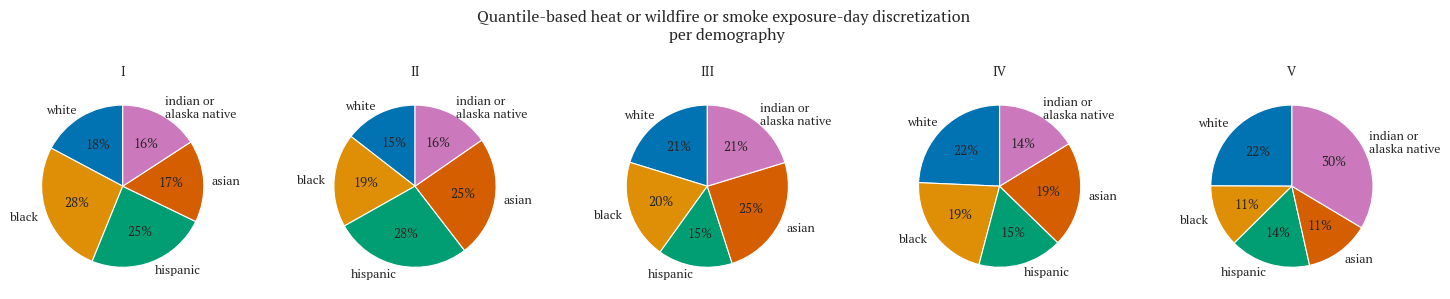

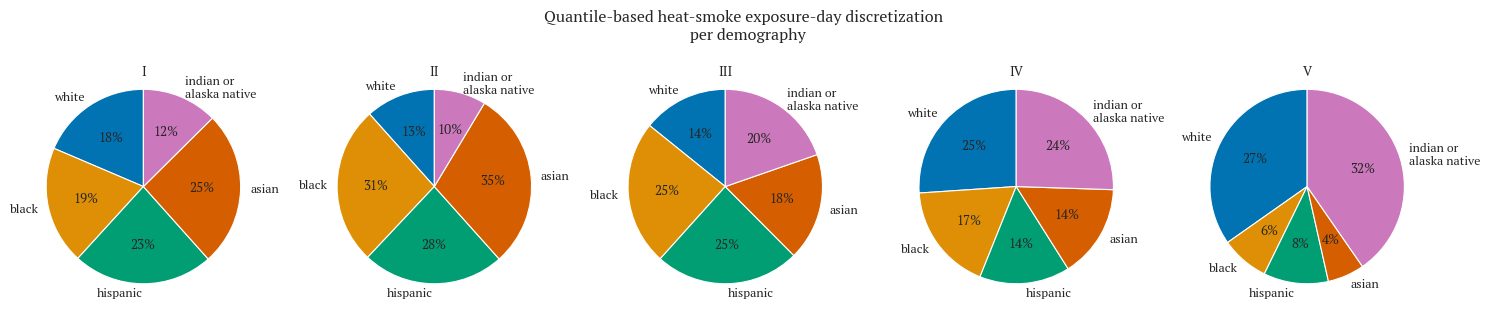

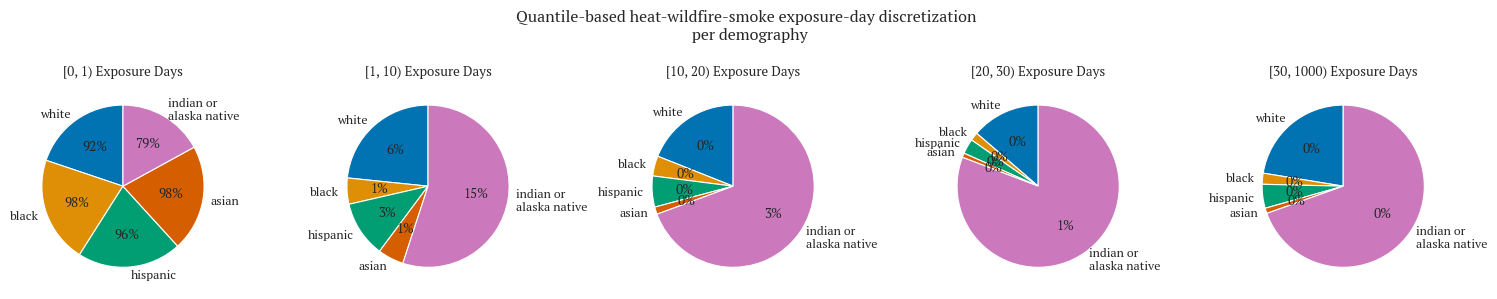

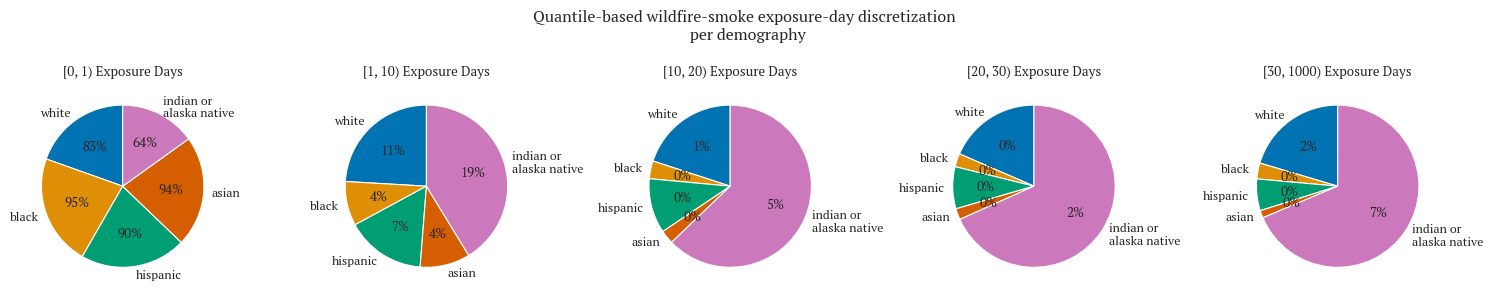

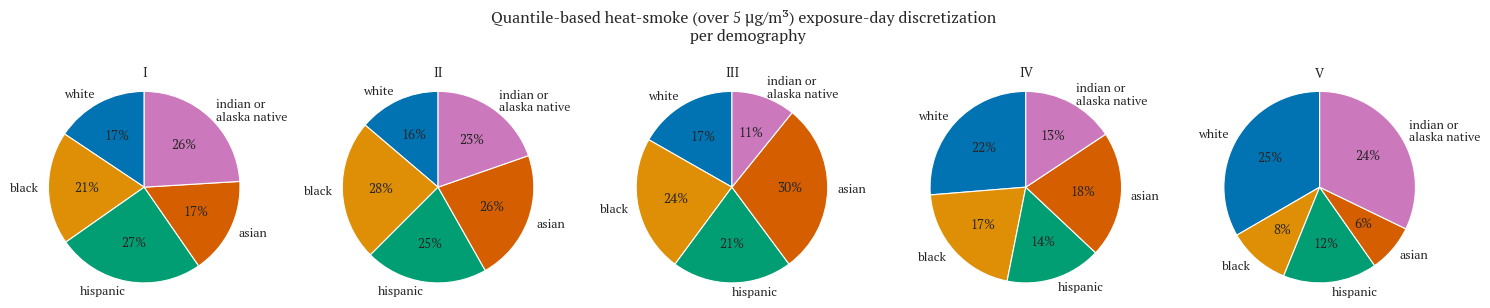

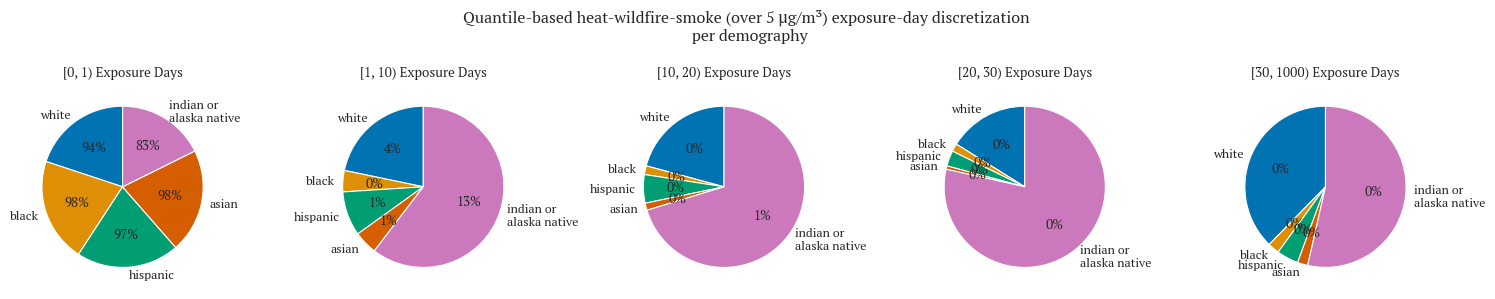

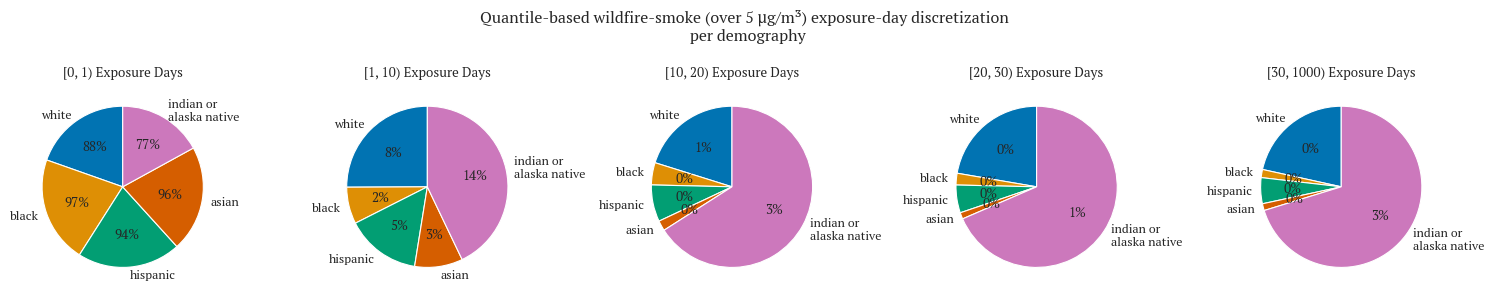

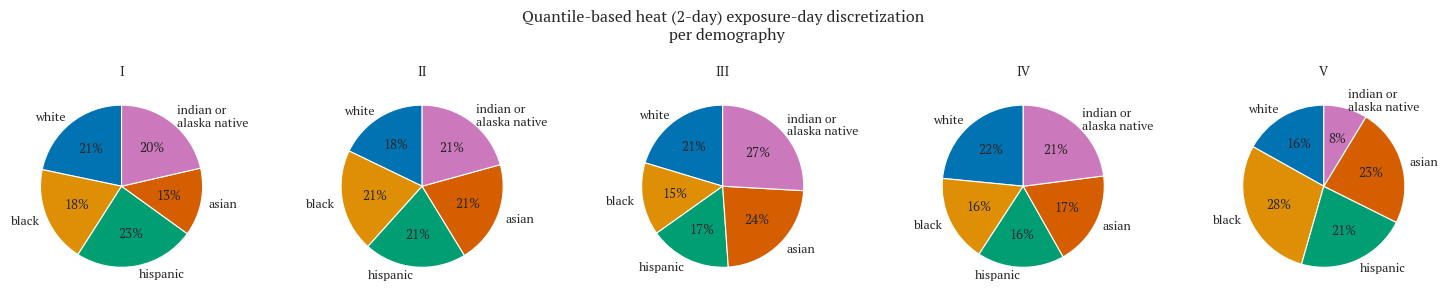

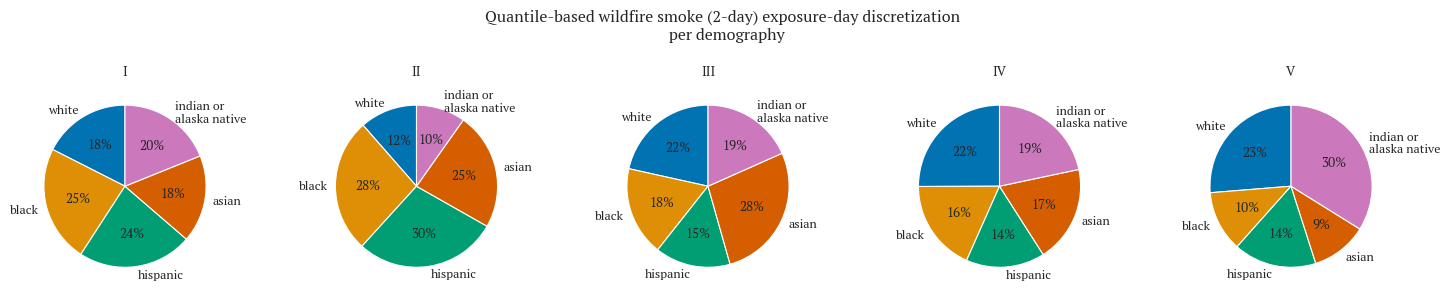

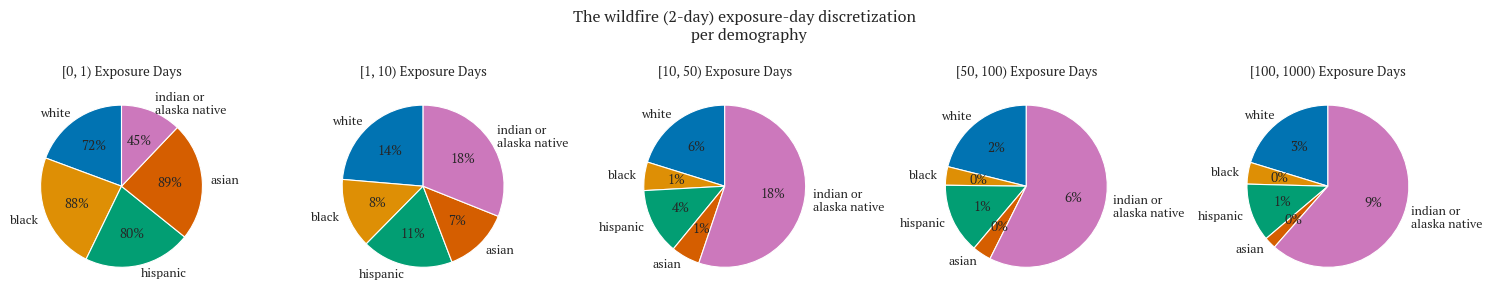

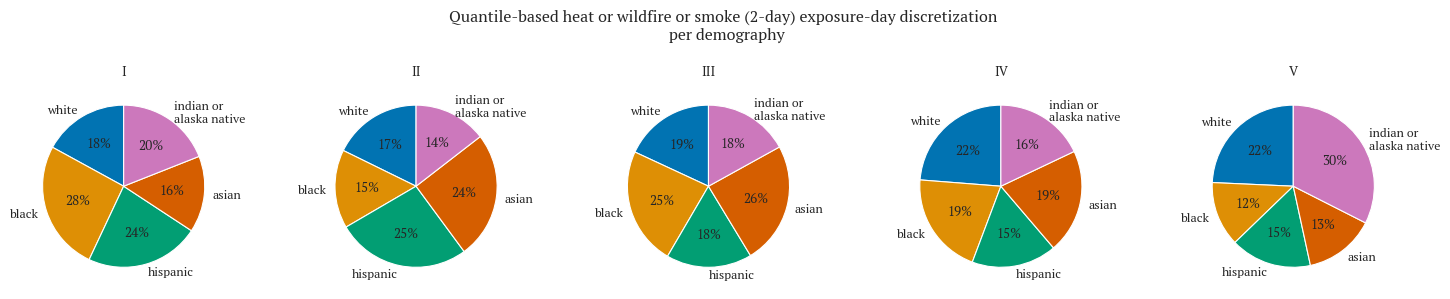

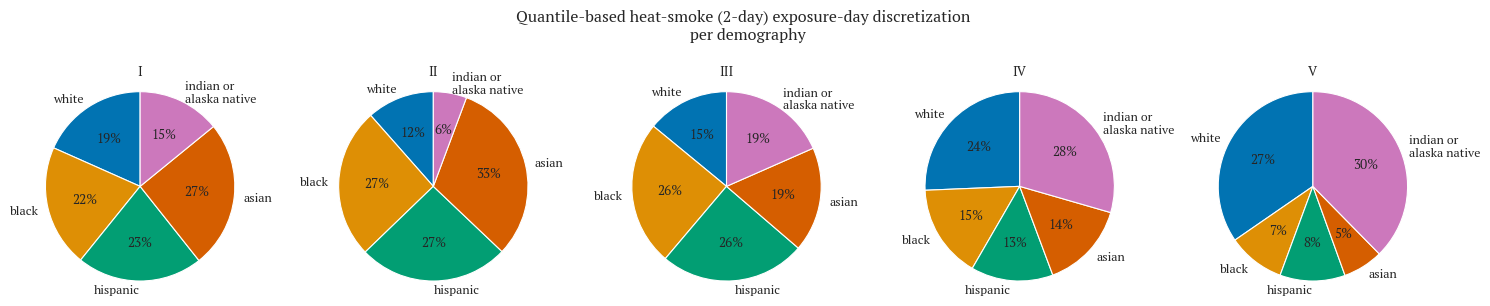

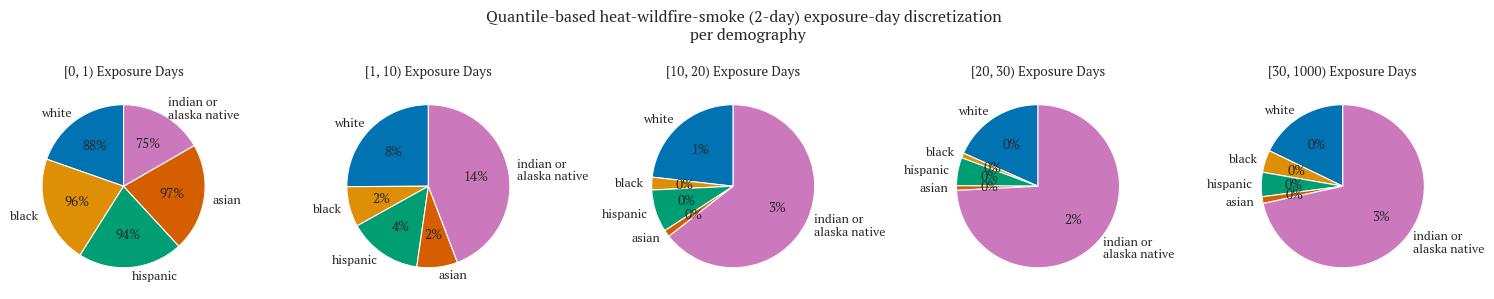

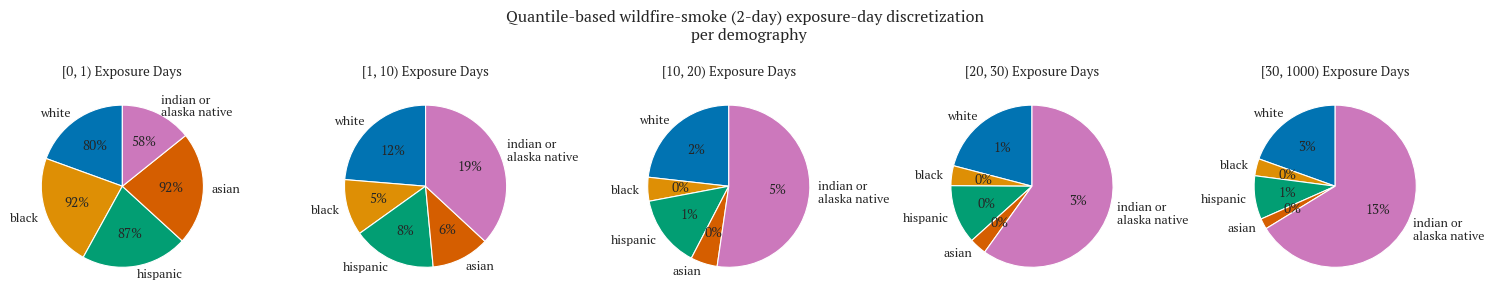

In [162]:
for hspt in hspts:
    df["exposure_category"] = helper_400.get_cut_vars(hspt, df[hspt])
    normalized_df = df.groupby("exposure_category")[cats].sum()

    fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # 1 row, 5 columns of subplots



    for i, (index, row) in enumerate(normalized_df.iterrows()):
        if hspt in [
            "wfday",
            "wfday_2d",
            "hw",
            "hws",
            "ws",
            "hws5",
            "ws5",
            "hws_2d",
            "ws_2d",
        ]:
            xlabel = f"{index} Exposure Days"
        else:
            xlabel = f"{index}"

        axs[i].pie(
            row, labels=row.index, startangle=90, autopct=lambda pct: func(pct, row)
        )
        axs[i].set_title(xlabel)
        axs[i].axis("equal")

    plt.suptitle(helper_400.get_title(hspt))
    plt.tight_layout()
    plt.savefig("figures/pie_chart_normalized" + "_" + hspt + "_wc.png")

    # plt.ylabel("Proportion of the demographic group (%)")
    # plt.xlabel("Exposure severity (higher is worse)")